<a href="https://colab.research.google.com/github/galn14/Google-Play-Store-Data-Scraping-/blob/main/Scrapping_data_Google_Play_Store_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 pandas scikit-learn matplotlib nltk


In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 26.6 MB/s eta 0:00:00


In [ ]:
# data processing
import numpy as np
import pandas as pd

# text processing and Natural Language Processing
import nltk

# sentiment analysis leksikon base
from textblob import TextBlob

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# misc, text manipulation and management
import re
import warnings

print('Packages successfully imported.')

Packages successfully imported.


In [ ]:
pip install google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.8 MB/s eta 0:00:00


Load Data

In [ ]:
from google_play_scraper import reviews
import pandas as pd

# Ambil ulasan dari aplikasi
result, _ = reviews(
    'id.ac.binus.maya',  # ID aplikasi
    lang='id',           # Bahasa
    country='id',        # Negara
    count=1000           # Jumlah ulasan
)

# Konversi ke DataFrame mengunakan pandas
df = pd.DataFrame(result)

# hasil dari konversi disimpan ke dalam file CSV
df.to_csv("reviews.csv", index=False)
print("Data scraping selesai. Dataset disimpan sebagai reviews.csv")


Data scraping selesai. Dataset disimpan sebagai reviews.csv


In [ ]:

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

df.head()

Shape of the dataset: (96, 11)
Columns in the dataset: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,14aad69a-f21f-4436-a19e-ba97b0c25472,Sebastian Keane,https://play-lh.googleusercontent.com/a-/ALV-U...,Ribet,1,1,6.0.0,2024-11-14 06:12:58,None,NaT,6.0.0
1,38ffb0bb-2a6d-4056-b5b0-5c1aef6294b7,Ertx 05,https://play-lh.googleusercontent.com/a-/ALV-U...,"Banyak bug, tolong diperbaiki lagi kualitasnya...",1,8,6.0.0,2024-11-02 18:16:30,None,NaT,6.0.0
2,e45fdf7a-2ce3-4f16-a943-76390c3a0258,Sri Utami Rahayu,https://play-lh.googleusercontent.com/a-/ALV-U...,kenapa setelah diupdate ke versi 4.5.0 mau lia...,5,6,5.0.0,2024-10-17 01:09:57,None,NaT,5.0.0
3,30601a96-e8e4-4422-bd35-8dccae030b6d,Gerasimos Alven,https://play-lh.googleusercontent.com/a-/ALV-U...,"Banyak bug, butuh banyak perbaikan",1,1,5.0.3,2024-10-09 00:13:25,None,NaT,5.0.3
4,f3424a7d-41cd-4271-802f-3b2072f55398,Jason mandala S,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat sulit untuk membuka neksus di HP padaha...,5,0,5.0.3,2024-10-03 07:28:42,None,NaT,5.0.3


Preprocessing

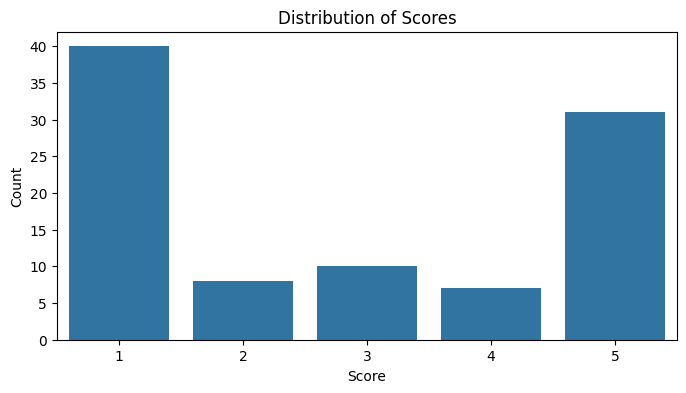

In [ ]:
# analyzing score distribution

# Dengan mengunakan Seaborn untuk mengetahui seberapa sering skor tertentu muncul dalam dataset
score_counts = df.score.value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [ ]:
# Preprocessing Teks
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob  # Import TextBlob

nltk.download(['wordnet', 'omw-1.4', 'stopwords'])
english_stopwords = stopwords.words('english')
indonesian_stopwords = stopwords.words('indonesian')
all_stopwords = english_stopwords + indonesian_stopwords

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Membersihkan teks dengan lemmatization
def clean_text_with_lemmatization(text):
    if not isinstance(text, str):  # Jika input bukan string
        return ""
    text = text.lower() #konversi ke huruf kecil
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [word for word in words if word not in all_stopwords]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words) # Menghapus karakter non-alphanumeric, angka, dan stopwords (dalam bahasa Inggris dan Indonesia).

# Definisikan kata positif/negatif
positive_words = ["good", "baik", "bagus", "mudah", "membantu", "helpful", "berguna",]
negative_words = ["jelek", "bad", "sulit", "lemot", "ribet", "error", "mengganggu", "bug", "crash", "susah", "membingungkan"]

def label_sentiment(text):
        text_lower = text.lower()
        if any(word in text_lower for word in positive_words):
            return "positive"
        elif any(word in text_lower for word in negative_words):
            return "negative"
        else:
            return "neutral"

def get_sentiment(text):
    # Convert non-string values to string to avoid the TypeError
    if not isinstance(text, str):
        text = str(text)
    return TextBlob(text).sentiment.polarity

# Load dataset
df = pd.read_csv("reviews.csv")  # Uncomment jika dataset perlu dimuat dari file

# Periksa apakah kolom 'content_c' ada, jika tidak ada, buat kolom baru
if 'content_c' not in df.columns:
    # Jika kolom 'content_c' tidak ada, buat kolom baru dengan nilai default atau berdasarkan kolom lain
    print(f"Kolom 'content_c' tidak ditemukan. Membuat kolom baru 'content_c'.")
    df['content_c'] = df.get('content', '')  # Jika 'content' ada, gunakan itu, jika tidak buat kosong


# Tangani NaN dan pastikan kolom berupa string
df['content_c'] = df['content_c'].fillna('').astype(str)  # Menggunakan 'content_c' yang baru dibuat atau kolom alternatif
df["Cleaned_Review"] = df['content_c'].apply(clean_text_with_lemmatization)
df["Sentiment"] = df['content_c'].apply(label_sentiment)

# Simpan data yang sudah dibersihkan
df.to_csv("cleaned_reviews.csv", index=False)
print("Pre-processing selesai. Dataset disimpan sebagai cleaned_reviews.csv")


Kolom 'content_c' tidak ditemukan. Membuat kolom baru 'content_c'.
Pre-processing selesai. Dataset disimpan sebagai cleaned_reviews.csv


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Validasi hasil
df_cleaned = pd.read_csv("cleaned_reviews.csv")
print(df_cleaned.head())

                               reviewId          userName  \
0  14aad69a-f21f-4436-a19e-ba97b0c25472   Sebastian Keane   
1  38ffb0bb-2a6d-4056-b5b0-5c1aef6294b7           Ertx 05   
2  e45fdf7a-2ce3-4f16-a943-76390c3a0258  Sri Utami Rahayu   
3  30601a96-e8e4-4422-bd35-8dccae030b6d   Gerasimos Alven   
4  f3424a7d-41cd-4271-802f-3b2072f55398   Jason mandala S   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0                                              Ribet      1              1   
1  Banyak bug, tolong diperbaiki lagi kualitasnya...      1              8   
2  kenapa setelah diupdate ke versi 4.5.0 mau lia...      5   

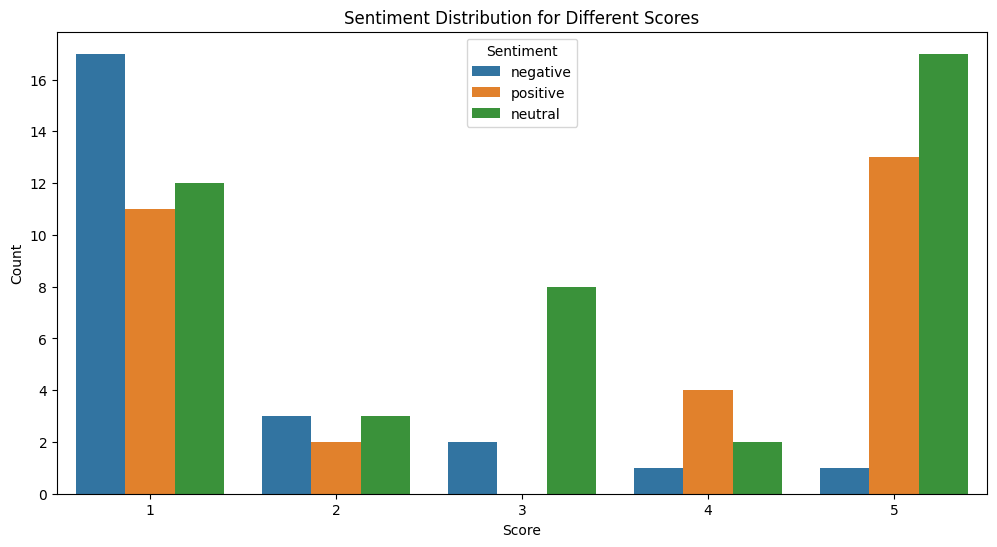

In [ ]:
# sentiment analysis distribution

import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure menentukan ukuran grafik untuk memastikan plot terlihat proporsional.
plt.figure(figsize=(12, 6)) # Membuat area visualisasi dengan ukuran lebar 12 unit dan tinggi 6 unit.

# Membuat plot distribusi sentimen untuk setiap skor ulasan menggunakan seaborn.

# Change 'sentiment_label' to 'Sentiment'
sns.countplot(data=df_cleaned, x='score', hue='Sentiment')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Different Scores')
plt.legend(title='Sentiment')
#plt.show()

Naive Bayes Performance:
              precision    recall  f1-score   support

    negative       1.00      0.20      0.33         5
     neutral       0.47      1.00      0.64         7
    positive       0.75      0.38      0.50         8

    accuracy                           0.55        20
   macro avg       0.74      0.53      0.49        20
weighted avg       0.71      0.55      0.51        20

Accuracy: 0.55

SVM Performance:
              precision    recall  f1-score   support

    negative       1.00      0.40      0.57         5
     neutral       0.54      1.00      0.70         7
    positive       0.80      0.50      0.62         8

    accuracy                           0.65        20
   macro avg       0.78      0.63      0.63        20
weighted avg       0.76      0.65      0.63        20

Accuracy: 0.65


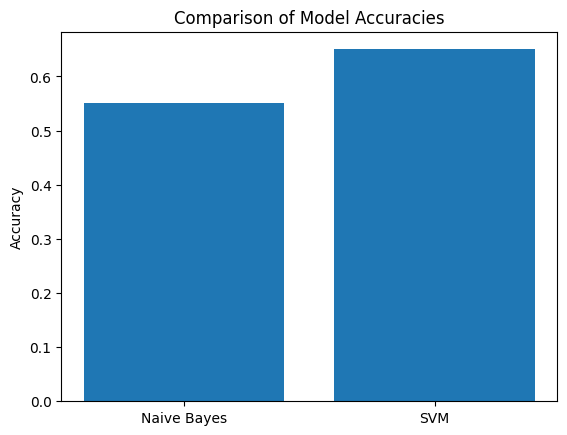

In [ ]:
# Machine Learning

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Vectorizer (TF-IDF)
vectorizer = TfidfVectorizer()

# Replace NaN values in 'Cleaned_Review' with empty strings before vectorization
df['Cleaned_Review'] = df['Cleaned_Review'].fillna('').astype(str)

X = vectorizer.fit_transform(df["Cleaned_Review"])
y = df["Sentiment"]

# Split data menjadi training dan testing, Dataset dibagi menjadi data latih (80%) dan data uji (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Model 2: SVM
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi kinerja model
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Visualisasi perbandingan akurasi
models = ["Naive Bayes", "SVM"]
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)]
plt.bar(models, accuracies)
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning (Grid Search)
# Meningkatkan performa SVM dengan GridSearchCV

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

# Buat objek GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Latih model dengan Grid Search
grid.fit(X_train, y_train)

# Cetak parameter terbaik
print(grid.best_params_)

# Evaluasi model dengan parameter terbaik
y_pred_svm_tuned = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_svm_tuned))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.438 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.438 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.467 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.467 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.467 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.467 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.438 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

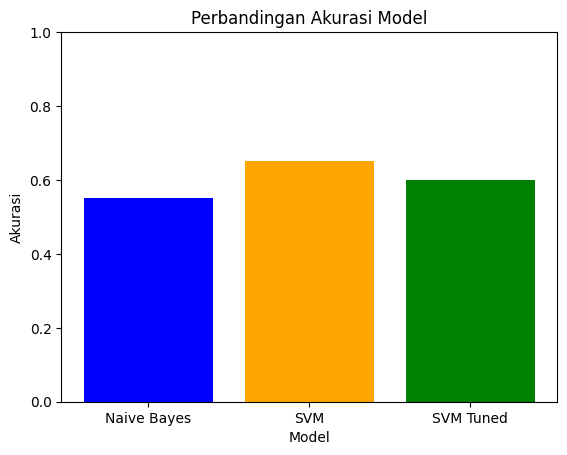

In [ ]:
# Visualisasi Performa Model
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'SVM', 'SVM Tuned']
accuracies = [accuracy_score(y_test, y_pred_nb),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_svm_tuned)]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.ylim([0, 1])  # Atur batas sumbu y agar mudah dibaca
plt.show()

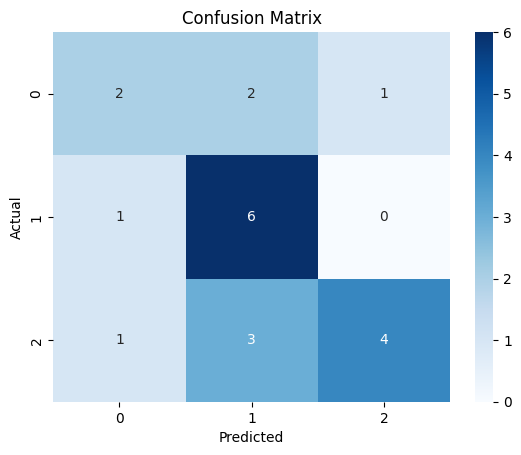

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghasilkan confusion matrix untuk model terbaik (SVM tuned).

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_tuned)

# Visualisasikan confusion matrix dengan Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()